### Dataframesh Session5

In [11]:
# Ignore non-harmful warnigs
from warnings import filterwarnings
filterwarnings ('ignore')

### Read the cars 93 dataset

In [18]:
import pandas as pd
path1 =  r"D:\ETL Hive\Python ETL\28th Jul 24 Python\Cars93.csv"
df = pd.read_csv(path1, na_values =['','NA'], keep_default_na=False)
df.head()


,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [20]:
df.shape


(93, 28)

In [22]:
df.columns

Index(['id', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [24]:
df.index

RangeIndex(start=0, stop=93, step=1)

In [30]:
df.dtypes


id                      int64
Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city                int64
MPG.highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev.per.mile            int64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers              int64
Length                  int64
Wheelbase               int64
Width                   int64
Turn.circle             int64
Rear.seat.room        float64
Luggage.room          float64
Weight                  int64
Origin                 object
Make                   object
dtype: object

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [34]:
df.nunique()

id                    93
Manufacturer          32
Model                 93
Type                   6
Min.Price             79
Price                 81
Max.Price             79
MPG.city              21
MPG.highway           22
AirBags                3
DriveTrain             3
Cylinders              6
EngineSize            26
Horsepower            57
RPM                   24
Rev.per.mile          78
Man.trans.avail        2
Fuel.tank.capacity    38
Passengers             6
Length                51
Wheelbase             27
Width                 16
Turn.circle           14
Rear.seat.room        24
Luggage.room          16
Weight                81
Origin                 2
Make                  93
dtype: int64

In [38]:
df['Type'].unique()

array(['Small', 'Midsize', 'Compact', 'Large', 'Sporty', 'Van'],
      dtype=object)

In [40]:
df['Type'].value_counts()

Type
Midsize    22
Small      21
Compact    16
Sporty     14
Large      11
Van         9
Name: count, dtype: int64

### Missing Values

In [43]:
m =  df.isna().sum()
m

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [45]:
m[m>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

### Check Duplicates

In [48]:
df.duplicated().sum()

0

### Remove Duplicates

In [51]:
df=df.drop_duplicates(keep='first')

### Replacing missing values
1. Numerical - mean, median
2. Categorical (columns which contain text ) - mode ( Most frequently occuring Values)

df['Read,seat,room'].mean()

In [54]:
df['Rear.seat.room'].median()

27.5

In [56]:
df['Luggage.room'].mean()

13.890243902439025

In [58]:
df['Luggage.room'].median()

14.0

In [64]:
df['AirBags'].value_counts()

AirBags
Driver only           42
None                  33
Driver & Passenger    14
Name: count, dtype: int64

In [66]:
df['AirBags'].value_counts().index


Index(['Driver only', 'None', 'Driver & Passenger'], dtype='object', name='AirBags')

In [68]:
df['AirBags'].mode()[0]

'Driver only'

In [70]:
m[m>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

### Function to replace missing values - fillna

In [73]:
mn = df['Rear.seat.room'].mean()
mn

27.82967032967033

In [75]:
df['Rear.seat.room'] = df['Rear.seat.room'].fillna(mn)

In [77]:
df.isna().sum()

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         0
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

### Create a function to replace missing values

In [80]:
df.columns

Index(['id', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [82]:
df.dtypes

id                      int64
Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city                int64
MPG.highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev.per.mile            int64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers              int64
Length                  int64
Wheelbase               int64
Width                   int64
Turn.circle             int64
Rear.seat.room        float64
Luggage.room          float64
Weight                  int64
Origin                 object
Make                   object
dtype: object

In [99]:
df[df['Type']=='Small']

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
22,23,Dodge,Colt,Small,7.9,9.2,10.6,29,33,None,...,5,174,98,66,32,26.5,11.0,2270,USA,Dodge Colt
23,24,Dodge,Shadow,Small,8.4,11.3,14.2,23,29,Driver only,...,5,172,97,67,38,26.5,13.0,2670,USA,Dodge Shadow
28,29,Eagle,Summit,Small,7.9,12.2,16.5,29,33,None,...,5,174,98,66,36,26.5,11.0,2295,USA,Eagle Summit
30,31,Ford,Festiva,Small,6.9,7.4,7.9,31,33,None,...,4,141,90,63,33,26.0,12.0,1845,USA,Ford Festiva
31,32,Ford,Escort,Small,8.4,10.1,11.9,23,30,None,...,5,171,98,67,36,28.0,12.0,2530,USA,Ford Escort
38,39,Geo,Metro,Small,6.7,8.4,10.0,46,50,None,...,4,151,93,63,34,27.5,10.0,1695,non-USA,Geo Metro
41,42,Honda,Civic,Small,8.4,12.1,15.8,42,46,Driver only,...,4,173,103,67,36,28.0,12.0,2350,non-USA,Honda Civic
43,44,Hyundai,Excel,Small,6.8,8.0,9.2,29,33,None,...,5,168,94,63,35,26.0,11.0,2345,non-USA,Hyundai Excel
44,45,Hyundai,Elantra,Small,9.0,10.0,11.0,22,29,None,...,5,172,98,66,36,28.0,12.0,2620,non-USA,Hyundai Elantra


In [101]:
cat = list(df.columns[df.dtypes=='object'])
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [103]:
con = list(df.columns[df.dtypes!='object'])
con

['id',
 'Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

In [105]:
for i in df.columns:
    print(i)

id
Manufacturer
Model
Type
Min.Price
Price
Max.Price
MPG.city
MPG.highway
AirBags
DriveTrain
Cylinders
EngineSize
Horsepower
RPM
Rev.per.mile
Man.trans.avail
Fuel.tank.capacity
Passengers
Length
Wheelbase
Width
Turn.circle
Rear.seat.room
Luggage.room
Weight
Origin
Make


### 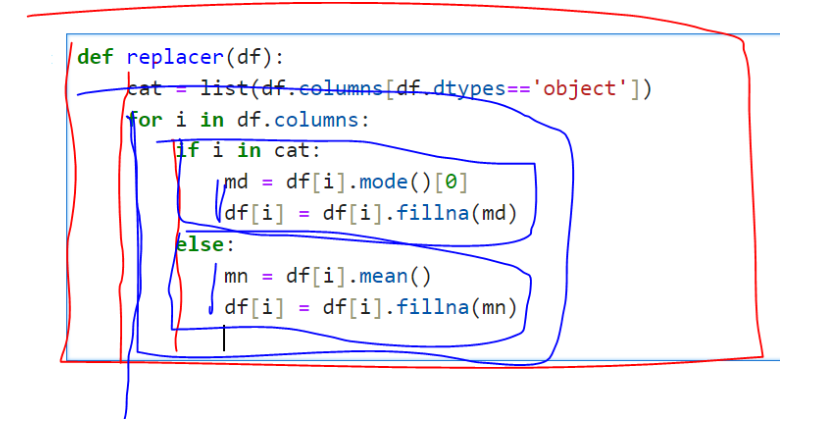

In [108]:
def replacer(df):
    cat = list(df.columns[df.dtypes=='object'])
    for i in df.columns:
        if i in cat:
            md = df[i].mode()[0]
            df[i] = df[i].fillna(md)
        else:
            mn = df[i].mean()
            df[i] = df[i].fillna(mn)
    print('Missing values replaced')    

In [110]:
df.isna().sum()


id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         0
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [112]:
replacer(df)


Missing values replaced


In [114]:
df.isna().sum()


id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

In [116]:
df.head()


,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver only,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


### Save above to csv


In [119]:
import os
os.chdir(r"D:\ETL Hive\Python ETL\28th Jul 24 Python")

In [121]:
df.to_csv("Cars93Clean.csv", index=False)

### Apply function in Detail


In [124]:
B = df.loc[:, ["Manufacturer", "Model", "Price", "MPG.highway", "MPG.city"]]
B.head()

,Manufacturer,Model,Price,MPG.highway,MPG.city
0,Acura,Integra,15.9,31,25
1,Acura,Legend,33.9,25,18
2,Audi,90,29.1,26,20
3,Audi,100,37.7,26,19
4,BMW,535i,30.0,30,22


### 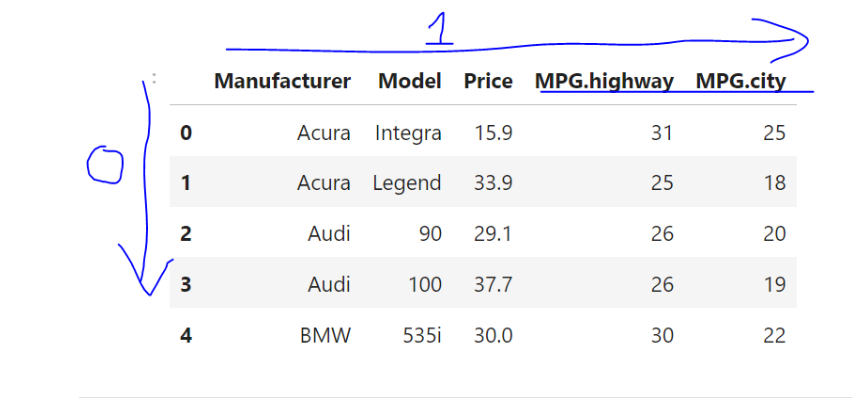

In [127]:
def get_average(row):
    avg = (row['MPG.city'] + row['MPG.highway'])/2
    return avg

In [129]:
B["MPG.avg"] = B.apply(get_average, axis=1)


In [131]:
B

,Manufacturer,Model,Price,MPG.highway,MPG.city,MPG.avg
0,Acura,Integra,15.9,31,25,28.0
1,Acura,Legend,33.9,25,18,21.5
2,Audi,90,29.1,26,20,23.0
3,Audi,100,37.7,26,19,22.5
4,BMW,535i,30.0,30,22,26.0
...,...,...,...,...,...,...
88,Volkswagen,Eurovan,19.7,21,17,19.0
89,Volkswagen,Passat,20.0,30,21,25.5
90,Volkswagen,Corrado,23.3,25,18,21.5
91,Volvo,240,22.7,28,21,24.5


### Cateogize cars based on condition
Price < 17 --> Cheap

17 - 22 -- Moderate|

22+ --> Expensie

In [134]:
def price_category(price):
    if price<17:
        c = "Cheap"
    elif price>=17 and price<22:
        c = "Moderate"
    else:
        c = "Expensive"
    return c

In [136]:
price_category(20)


'Moderate'

In [138]:
price_category(7)


'Cheap'

In [140]:
price_category(30)


'Expensive'

In [142]:
B['Price_category'] = B['Price'].apply(price_category)


In [144]:
B

,Manufacturer,Model,Price,MPG.highway,MPG.city,MPG.avg,Price_category
0,Acura,Integra,15.9,31,25,28.0,Cheap
1,Acura,Legend,33.9,25,18,21.5,Expensive
2,Audi,90,29.1,26,20,23.0,Expensive
3,Audi,100,37.7,26,19,22.5,Expensive
4,BMW,535i,30.0,30,22,26.0,Expensive
...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,19.7,21,17,19.0,Moderate
89,Volkswagen,Passat,20.0,30,21,25.5,Moderate
90,Volkswagen,Corrado,23.3,25,18,21.5,Expensive
91,Volvo,240,22.7,28,21,24.5,Expensive


In [146]:
B['Price_category'].value_counts()


Price_category
Cheap        45
Expensive    26
Moderate     22
Name: count, dtype: int64

In [148]:
B.groupby(by='Price_category').agg({"MPG.avg":"mean"})


,MPG.avg
Price_category,
Cheap,29.077778
Expensive,22.000000
Moderate,23.272727


<Axes: xlabel='Price_category'>

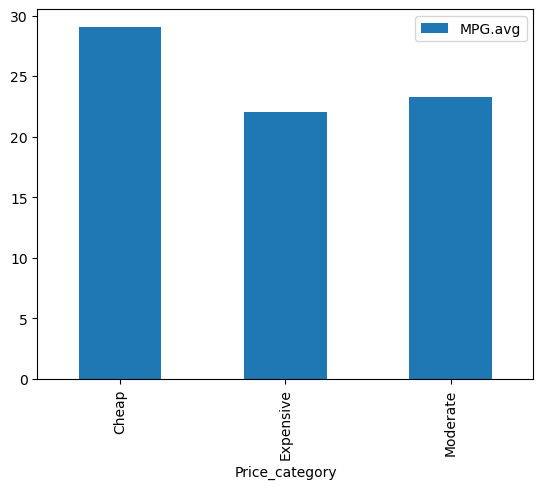

In [150]:
B.groupby(by='Price_category').agg({"MPG.avg":"mean"}).plot(kind='bar')


In [152]:
B.to_csv("CarsApply.csv", index=False)
